In [ ]:
!pip install hmmlearn -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 6.0 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow==2.9.1 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 108.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 106.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 37.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires protobuf<5,>=3.20, but you have protobuf 3.19.6 which is incompatible.
google-cloud-aiplatform 1.65.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.2

In [ ]:
#!pip install --quiet --user git+https://github.com/hmmlearn/hmmlearn
from hmmlearn import hmm
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Lambda, Input, Dense,BatchNormalization, LeakyReLU, Dense, Reshape, Flatten, Activation
from tensorflow.keras.losses import mse, binary_crossentropy, kl_divergence
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from tensorflow.keras import initializers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, multiply, GaussianNoise, MaxPooling2D, concatenate,LeakyReLU
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from scipy.stats import kurtosis
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
%matplotlib inline

In [ ]:
def plot_measure(df):
  e=np.unique(df['Anomaly_At_Time_ms'])[0]
  df=df[df.TimeMS > 400]
  #plt.plot('TimeMS','StrainGage',data=df)
  #plt.plot('TimeMS','Avg_Velocity',data=df)
  plt.figure(figsize=(16,12))
  for i in range(1,5):
    measure=measures[i-1]
    plt.subplot(2,2,i)
    plt.title(measure.title() + ' from a surgical instrument')
    # naming the x axis
    plt.xlabel('Time in Milliseconds')
    # naming the y axis
    plt.ylabel(measure.title())
    plt.plot('TimeMS',measure,data=df)
    #plt.plot('TimeMS','avg_current',data=df)
    plt.legend(loc="upper left")
    plt.axvline(e, color='r')
  plt.show()

In [ ]:
data = pd.read_csv('/content/stapler-ds (1).csv')



In [ ]:
 data[data['id'] == 2][['Label']]


,Label
658343,0
658344,0
658345,0
658346,0
658347,0
...,...
662102,1
662103,1
662104,1
662105,1


In [ ]:
cols=['id', 'TimeMS', 'Avg_Velocity', 'PWM_Output', 'SG_NoFilter', 'Setpoint', 'StrainGage', 'avg_current', 'current_filter', 'ticks', 'True_Endstop_Time_ms', 'Articulation', 'Tissue', 'Tissue_Thickness_inch', 'Firing_Type','Label']
measures=['Avg_Velocity','StrainGage','avg_current','PWM_Output','Label','Anomaly_At_Time_ms','id','TimeMS']
for i in range(1,6):
  measure=measures[i-1]
  print(measure.title())
data=data[measures]

Avg_Velocity
Straingage
Avg_Current
Pwm_Output
Label


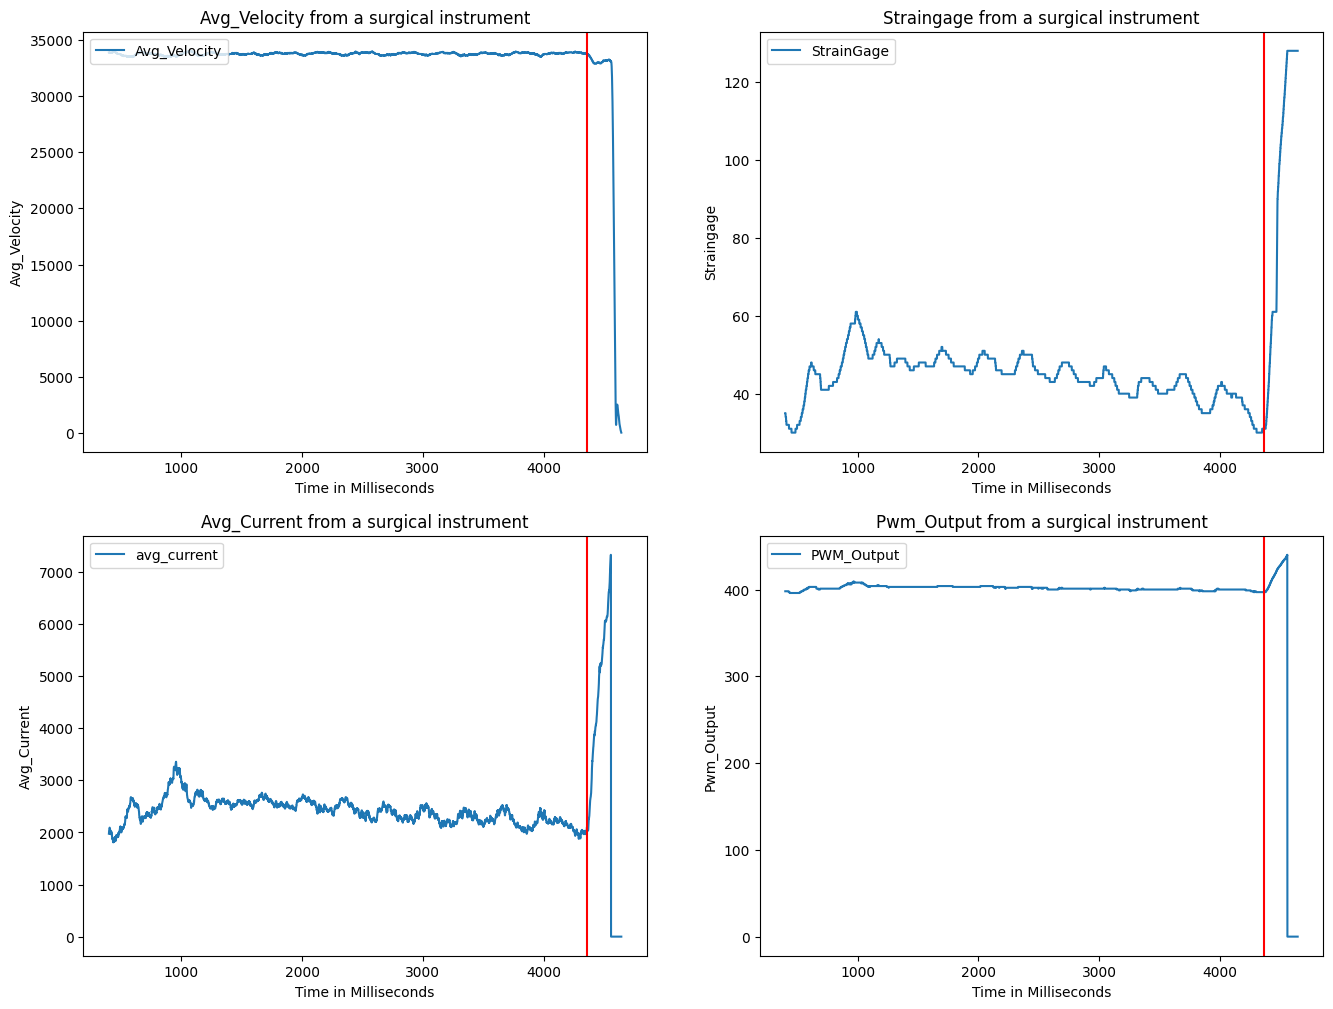

In [ ]:
df_97=data["id"]==97
plot_measure(data[df_97])

In [ ]:
train_set=data[data['Label']==0]
train_set

,Avg_Velocity,StrainGage,avg_current,PWM_Output,Label,Anomaly_At_Time_ms,id,TimeMS
0,0.0,1,0,153,0,3360,100,0
1,0.0,2,0,165,0,3360,100,1
2,0.0,4,0,176,0,3360,100,2
3,0.0,5,0,188,0,3360,100,3
4,0.0,6,0,199,0,3360,100,4
...,...,...,...,...,...,...,...,...
3182441,33750.0,31,2101,397,0,4363,97,4360
3182442,33750.0,31,2105,397,0,4363,97,4361
3182443,33750.0,31,2105,397,0,4363,97,4361
3182444,33750.0,31,2105,397,0,4363,97,4362


In [ ]:
test_set=data[data['Label']==1]

In [ ]:
# group data from all ids in to anomaly and non-anomaly
# create window of 100 consecutive timems for both anomaly and non-anomaly - identify the consecutive timems using id+timems
# train the algo on (80%)normal, RNN time step 100
# find the threshold
# validate


In [ ]:
data[['TimeMS','id']].groupby('id').count()

,TimeMS
id,
2,3764
3,3681
4,7436
5,7468
6,7376
...,...
366,12422
368,22102
370,12286


In [ ]:
# Generate the Label column based on the condition: if TimeMS >= Anomaly_At_Time_ms, it's an anomaly
for i in np.unique(data['id']):
    # Get the anomaly time for this specific 'id'
    anomaly_time = data[data['id'] == i]['Anomaly_At_Time_ms'].values[0]

    # Update the Label column: 1 if TimeMS >= Anomaly_At_Time_ms, else 0
    data.loc[data['id'] == i, 'Label'] = np.where(data.loc[data['id'] == i, 'TimeMS'] >= anomaly_time, 1, 0)

# Sort data by time to preserve the temporal order
data = data.sort_values(by=['id', 'TimeMS'])

# Separate normal (Label=0) and anomalous (Label=1) data
normal_data = data[data['Label'] == 0]  # Normal instances
anomalous_data = data[data['Label'] == 1]  # Anomalous instances


In [ ]:
# Split normal data into 85% train and 15% test (keeping the temporal order)
train_size = int(len(normal_data) * 0.85)
train_set_normal = normal_data.iloc[:train_size]  # 85% of normal data for training
test_set_normal = normal_data.iloc[train_size:]   # 15% of normal data for testing

# Test set includes 10% normal data and all the anomalous data
test_set = pd.concat([test_set_normal, anomalous_data])

# Ensure y_test contains a mix of 0s (normal) and 1s (anomalies)
y_test = test_set['Label']

# Verify the mix of 0s and 1s
print("Label distribution in y_test:")
print(y_test.value_counts())  # This will show the number of 0s (normal) and 1s (anomalies)


Label distribution in y_test:
Label
0    456178
1    141826
Name: count, dtype: int64


In [ ]:
# Features to be used for training and testing
#features = ['TimeMS', 'Avg_Velocity', 'PWM_Output', 'StrainGage', 'avg_current']
features = ['StrainGage']
# Train and test data
X_train = train_set_normal[features]
X_test = test_set[features]

In [ ]:
# Scale the data (normalization)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Hidden Markov Model Training on Normal Data
num_states = 2  # Two states: normal and anomalous
model = hmm.GaussianHMM(n_components=num_states, covariance_type="tied", random_state=42, n_iter=1000)

# Train the model on normal data
model.fit(X_train_scaled)


GaussianHMM(covariance_type='tied', n_components=2, n_iter=1000,
            random_state=42)

In [ ]:
# Calculate log-likelihood for each observation in the test set
log_likelihood = np.array([model.score([X_test_scaled[i]]) for i in range(len(X_test_scaled))])

# Set a threshold for log-likelihood (e.g., the 10th percentile of the likelihood on the test set)
threshold = np.percentile(log_likelihood, 10)

# Classify instances as anomalies if their log-likelihood is below the threshold
anomalies = log_likelihood < threshold

# Debug step: Check the number of detected anomalies
print(f"Number of anomalies detected: {np.count_nonzero(anomalies)}")

# Print anomaly ratio and classification report
print(f"Anomalies detected: {np.count_nonzero(anomalies) / len(anomalies)}")
print(classification_report(y_test, anomalies.astype(int)))


Number of anomalies detected: 58690
Anomalies detected: 0.09814315623306867
              precision    recall  f1-score   support

           0       0.84      1.00      0.92    456178
           1       0.99      0.41      0.58    141826

    accuracy                           0.86    598004
   macro avg       0.92      0.70      0.75    598004
weighted avg       0.88      0.86      0.84    598004



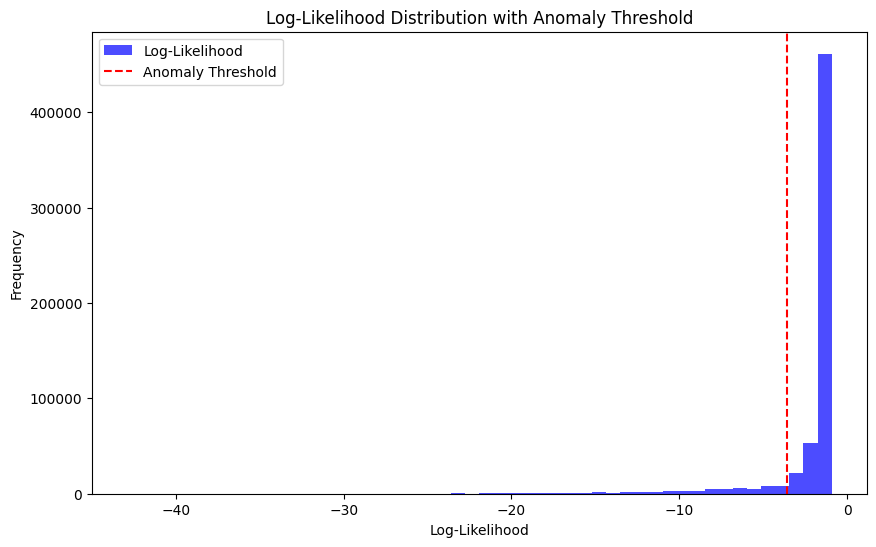

In [ ]:
# Optional: Plot the log-likelihood for visualization
plt.figure(figsize=(10, 6))
plt.hist(log_likelihood, bins=50, color='blue', alpha=0.7, label='Log-Likelihood')
plt.axvline(x=threshold, color='red', linestyle='--', label='Anomaly Threshold')
plt.legend()
plt.title("Log-Likelihood Distribution with Anomaly Threshold")
plt.xlabel("Log-Likelihood")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Function to evaluate the model at different thresholds
def evaluate_thresholds(log_likelihood, y_test, percentiles=np.arange(1, 100,10)):
    best_threshold = None
    best_f1 = 0
    best_metrics = {}

    # Loop over different percentiles to find the best threshold
    for perc in percentiles:
        threshold = np.percentile(log_likelihood, perc)
        anomalies = log_likelihood < threshold  # Predict anomaly if log-likelihood is below threshold
        y_pred = anomalies.astype(int)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print(f"Percentile: {perc} | Threshold: {threshold:.4f} | F1-Score: {f1:.4f} | Accuracy: {accuracy:.4f}")

        # If this F1 score is better than the previous best, update the best threshold and metrics
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
            best_metrics = {
                'threshold': threshold,
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1_score': f1
            }

    return best_threshold, best_metrics

In [ ]:
# Calculate log-likelihood for the test set
log_likelihood = np.array([model.score([X_test_scaled[i]]) for i in range(len(X_test_scaled))])

# Define a range of percentiles to test (from 1 to 99)
percentiles = np.arange(1, 100,10)  # Test percentiles from 1 to 99

# Find the best threshold
best_threshold, best_metrics = evaluate_thresholds(log_likelihood, y_test, percentiles)

# Output the best threshold and metrics
print("\nBest threshold found:")
print(f"Threshold: {best_metrics['threshold']}")
print(f"Accuracy: {best_metrics['accuracy']}")
print(f"Precision: {best_metrics['precision']}")
print(f"Recall: {best_metrics['recall']}")
print(f"F1-Score: {best_metrics['f1_score']}")

Percentile: 1 | Threshold: -15.9318 | F1-Score: 0.0768 | Accuracy: 0.7720
Percentile: 11 | Threshold: -3.1796 | F1-Score: 0.6076 | Accuracy: 0.8647
Percentile: 21 | Threshold: -1.8583 | F1-Score: 0.6364 | Accuracy: 0.8393
Percentile: 31 | Threshold: -1.5078 | F1-Score: 0.5916 | Accuracy: 0.7778
Percentile: 41 | Threshold: -1.2812 | F1-Score: 0.5442 | Accuracy: 0.7065
Percentile: 51 | Threshold: -1.1369 | F1-Score: 0.5115 | Accuracy: 0.6354
Percentile: 61 | Threshold: -1.0300 | F1-Score: 0.4870 | Accuracy: 0.5676
Percentile: 71 | Threshold: -0.9733 | F1-Score: 0.4585 | Accuracy: 0.4931
Percentile: 81 | Threshold: -0.9370 | F1-Score: 0.4367 | Accuracy: 0.4252
Percentile: 91 | Threshold: -0.9235 | F1-Score: 0.4106 | Accuracy: 0.3423

Best threshold found:
Threshold: -1.8582912145641597
Accuracy: 0.8393338506096949
Precision: 0.6868032699861981
Recall: 0.5929589779025003
F1-Score: 0.63644034767078


In [ ]:
anomalies_best = log_likelihood < best_metrics['threshold']  # Predict anomaly if log-likelihood is below threshold
y_pred_best = anomalies_best.astype(int)
print(classification_report(y_test, y_pred_best, target_names=["Normal", "Anomalous"]))


              precision    recall  f1-score   support

      Normal       0.88      0.92      0.90    456178
   Anomalous       0.69      0.59      0.64    141826

    accuracy                           0.84    598004
   macro avg       0.78      0.75      0.77    598004
weighted avg       0.83      0.84      0.84    598004

